In [37]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut

In [38]:
# Example set size.
M = 100

# Reset pseudo random generator to a known value so that results are reproducible.
np.random.seed(42)

def target_function(M, x):
    y = 1 + np.sin(2*np.pi*x)
    y = y.reshape(M, 1)
    y_noisy = y + 0.1*np.random.randn(M, 1)
    return y, y_noisy

In [39]:
x = np.linspace(0, 1, M).reshape(M, 1)

y, y_noisy = target_function(M, x)

In [40]:
i = 0
writer = csv.writer(open("./reg_poli.csv", 'w'), delimiter=',')
for row in y_noisy:
    writer.writerow((x[i][0], y_noisy[i][0]))
    i = i + 1

In [41]:
df = pd.read_csv('./reg_poli.csv', header=None)

x = df[0].to_numpy()
y_noisy = df[1].to_numpy()
           
x = x.reshape(len(x),1)
y_noisy = y_noisy.reshape(len(x),1)

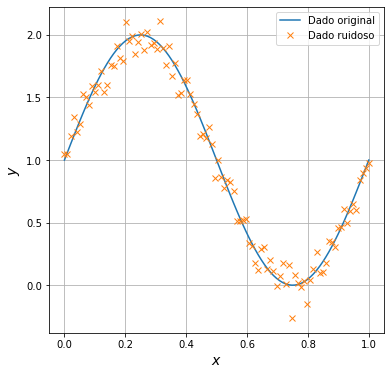

In [42]:
# Plot cost-function surface.
fig = plt.figure(figsize=(6,6))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid().
plt.show()

## Holdout cross-validation (70/30%)

In [43]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

include_bias = False

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

error_train = []
error_val = []


for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    
    # Perform polynomial regression.Training sets for test and validation.
    polynomial_regression.fit(x_val, y_val)
    polynomial_regression.fit(x_train, y_train)
    
    # Prediction sets for test and validation
    y_val_predict = polynomial_regression.predict(x_val)
    y_train_predict = polynomial_regression.predict(x_train)
    
    # Erro quadrático médio para os conjuntos de teste e validação.
    error_val.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    error_train.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

tamanho conjunto de treinamento: 70
tamanho conjunto de validação: 30
Tempo de execução: 0.0877 [s]


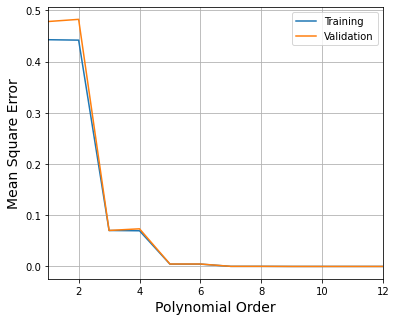

In [59]:
# Plot results.
plt.figure(figsize=(6, 5))
plt.plot(range(1, 13), error_train, label='Training')
plt.plot(range(1, 13), error_val, label='Validation')
plt.xlabel('Polynomial Order',  fontsize=14)
plt.ylabel('Mean Square Error',  fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
plt.show()

## k-fold cross-validation (k=10)

In [45]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []

for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 0.2270 [s]


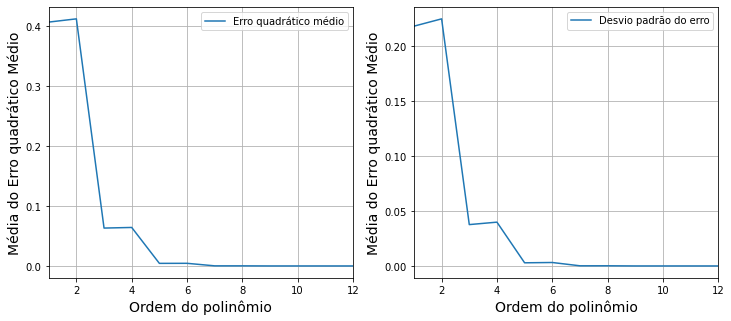

In [56]:
# Plot results.

plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.plot(range(1, 13), mean_vec, label='Erro quadrático médio')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.plot(range(1, 13), std_vec, label='Desvio padrão do erro')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
plt.show()

## Leave-p-out cross-validation (p=1)

In [47]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the LPOCV object.
lpocv = LeavePOut(p=1)

mean_vec = []
std_vec = []
for d in range(1, 13):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 2.3005 [s]


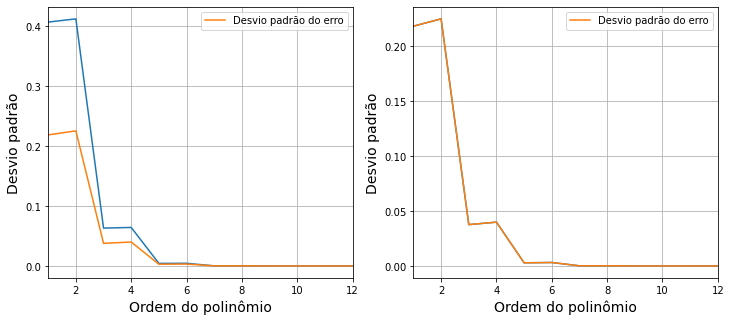

In [55]:
# Plot results.
plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 13), mean_vec)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.plot(range(1, 13), std_vec,  label='Desvio padrão do erro')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 13), std_vec)
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.plot(range(1, 13), std_vec,  label='Desvio padrão do erro')
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
plt.show()

## Learning-curves

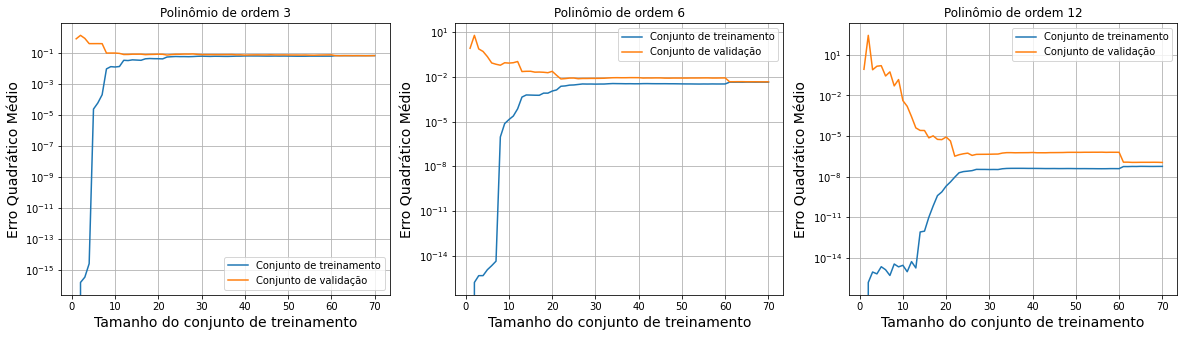

In [52]:
# Polinomial degrees to be tested.
degrees = [3, 6, 12]

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    

## Model training

In [60]:
# Best polynomial order
degree = 5
include_bias = False

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=degree, include_bias=include_bias)

# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()

# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
    ])

# Train model
polynomial_regression.fit(x, y)
   
# Predição do conjunto de treinamento.    
y_predicao = polynomial_regression.predict(x)

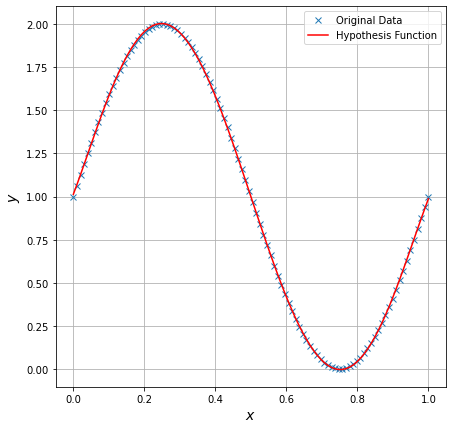

In [61]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.plot(x, y, 'x', label="Original Data")
plt.plot(x, y_predicao, 'r', label="Hypothesis Function")
plt.xlabel('$ x $', fontsize=14)
plt.ylabel('$ y $', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()